In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

from scipy import optimize
from scipy.io import loadmat
import utils

%matplotlib inline

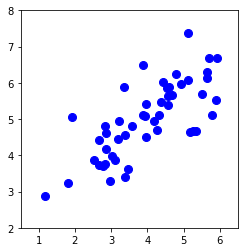

In [6]:
data = loadmat(os.path.join('Data', 'ex7data1.mat'))
X = data['X']

plt.plot(X[:, 0], X[:, 1], 'bo', ms=8)
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal')


In [7]:
def pca(X):
    m, n = X.shape

    Sigma = (1 / m) * (X.T.dot(X))
    U, S, V = np.linalg.svd(Sigma)
    
    return U, S

Top eigenvector: U[:, 0] = [-0.707107 -0.707107]
 (you should expect to see [-0.707107 -0.707107])


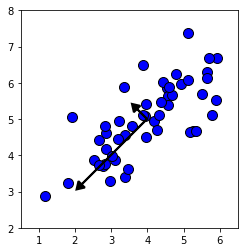

In [8]:
X_norm, mu, sigma = utils.featureNormalize(X)

U, S = pca(X_norm)

fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k')

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))
print(' (you should expect to see [-0.707107 -0.707107])')

In [9]:
def projectData(X, U, K):
    Z = np.zeros((X.shape[0], K))
    Z = np.dot(X,  U[:, :K])
    return Z

In [10]:
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
print('(this value should be about    : 1.481274)')

Projection of the first example: 1.481274
(this value should be about    : 1.481274)


In [14]:
def recoverData(Z, U, K):
    
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    X_rec = Z.dot(U[:, :K].T)
    
    return X_rec

Approximation of the first example: [-1.047419 -1.047419]
       (this value should be about  [-1.047419 -1.047419])


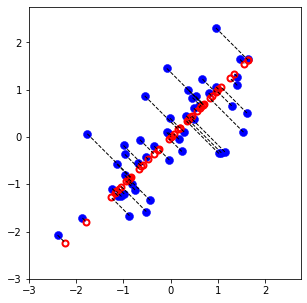

In [15]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
plt.axis([-3, 2.75, -3, 2.75])

ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

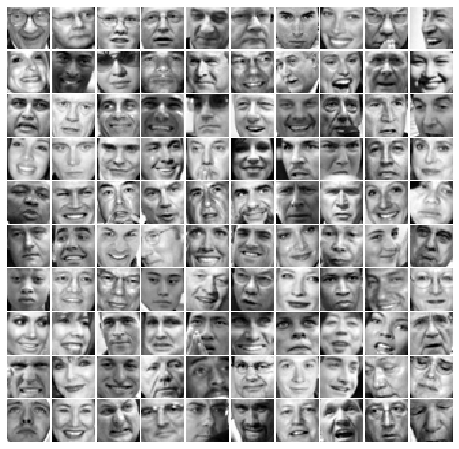

In [18]:
data = loadmat(os.path.join('Data', 'ex7faces.mat'))
X = data['X']

utils.displayData(X[:100, :], figsize=(8, 8))

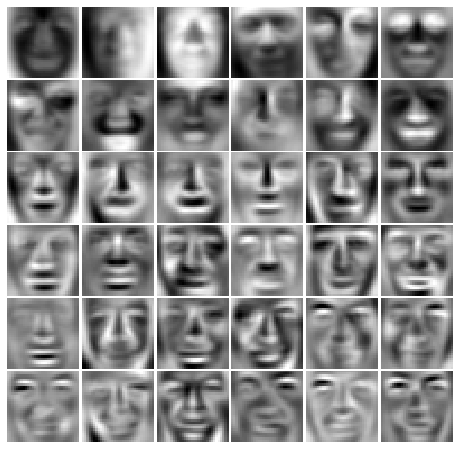

In [19]:
X_norm, mu, sigma = utils.featureNormalize(X)

U, S = pca(X_norm)

utils.displayData(U[:, :36].T, figsize=(8, 8))

In [20]:
K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a shape of: ', Z.shape)

The projected data Z has a shape of:  (5000, 100)


Text(0.5, 0.98, 'Recovered faces')

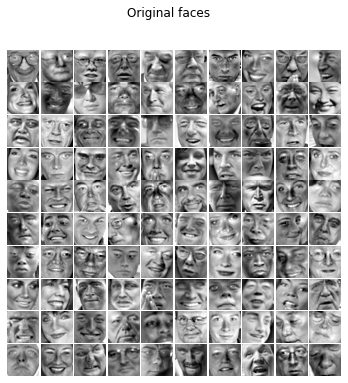

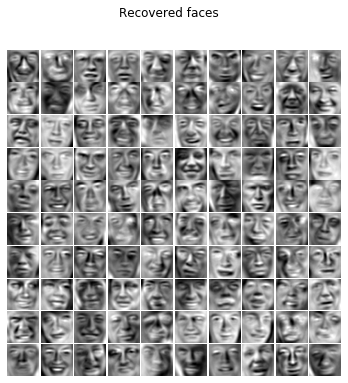

In [23]:
K = 100
X_rec  = recoverData(Z, U, K)

utils.displayData(X_norm[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Original faces')

utils.displayData(X_rec[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Recovered faces')
